In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear_function(a, x, b):
    return a*x + b

In [3]:
a = 2
x = np.arange(100)
b = 45
y = linear_function(a, x, b)

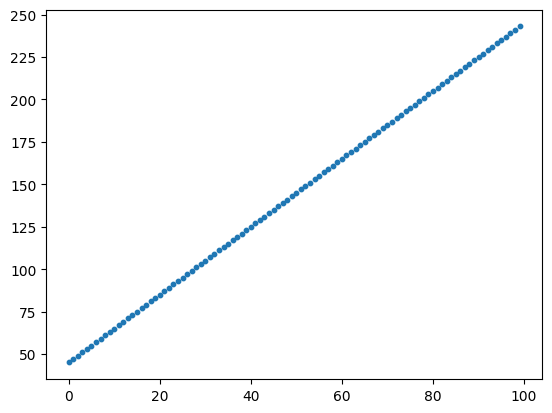

In [4]:
plt.scatter(x, y, s=10)
plt.show()

In [5]:
# https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524

noise = np.random.normal(0, 10, len(x))
y_noisy = y + noise

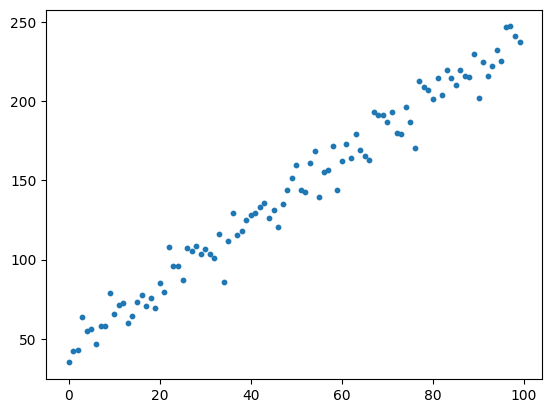

In [6]:
plt.scatter(x, y_noisy, s=10)
plt.show()

# Derivation of Least Squares Estimates for $\beta_1$ and $\beta_0$

We want to find $\beta_1$ and $\beta_0$ that minimize the **Residual Sum of Squares (RSS)** for a simple linear regression model:

$$
y = \beta_1 x + \beta_0
$$

## Step 1: Define the Residual Sum of Squares (RSS)

The RSS is given by:

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_1 x_i + \beta_0))^2
$$

Our goal is to minimize $RSS$ with respect to $\beta_0$ and $\beta_1$.

## Step 2: Compute Partial Derivatives

To find the optimal values of $\beta_0$ and $\beta_1$, we take partial derivatives of $RSS$ and set them to zero.

### Partial Derivative with Respect to $\beta_0$

$$
\frac{\partial RSS}{\partial \beta_0} = \sum_{i=1}^{n} 2(y_i - (\beta_1 x_i + \beta_0))(-1) = -2 \sum_{i=1}^{n} (y_i - \beta_1 x_i - \beta_0)
$$

Setting it to zero:

$$
\sum_{i=1}^{n} (y_i - \beta_1 x_i - \beta_0) = 0
$$

Rearrange:

$$
\sum_{i=1}^{n} y_i = \beta_1 \sum_{i=1}^{n} x_i + n \beta_0
$$

Dividing by $n$:

$$
\bar{y} = \beta_1 \bar{x} + \beta_0
$$

Thus, solving for $\beta_0$:

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

### Partial Derivative with Respect to $\beta_1$

$$
\frac{\partial RSS}{\partial \beta_1} = \sum_{i=1}^{n} 2(y_i - (\beta_1 x_i + \beta_0))(-x_i) = -2 \sum_{i=1}^{n} x_i (y_i - \beta_1 x_i - \beta_0)
$$

Setting it to zero:

$$
\sum_{i=1}^{n} x_i y_i - \beta_1 \sum_{i=1}^{n} x_i^2 - \beta_0 \sum_{i=1}^{n} x_i = 0
$$

Substituting $\beta_0 = \bar{y} - \beta_1 \bar{x}$:

$$
\sum_{i=1}^{n} x_i y_i - \beta_1 \sum_{i=1}^{n} x_i^2 - (\bar{y} - \beta_1 \bar{x}) \sum_{i=1}^{n} x_i = 0
$$

Expanding:

$$
\sum_{i=1}^{n} x_i y_i - \beta_1 \sum_{i=1}^{n} x_i^2 - \bar{y} \sum_{i=1}^{n} x_i + \beta_1 \bar{x} \sum_{i=1}^{n} x_i = 0
$$

Rearrange:

$$
\sum_{i=1}^{n} x_i y_i - \bar{y} \sum_{i=1}^{n} x_i = \beta_1 \left( \sum_{i=1}^{n} x_i^2 - \bar{x} \sum_{i=1}^{n} x_i \right)
$$

Since $\sum_{i=1}^{n} x_i = n \bar{x}$, we simplify:

$$
\sum_{i=1}^{n} x_i y_i - n \bar{x} \bar{y} = \beta_1 \left( \sum_{i=1}^{n} x_i^2 - n \bar{x}^2 \right)
$$

Dividing both sides by $\sum_{i=1}^{n} x_i^2 - n \bar{x}^2$:

$$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

## Final Formulae

Thus, we obtain the least squares estimates:

$$
\beta_1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

These equations provide the optimal values of $\beta_0$ and $\beta_1$ for minimizing the RSS in simple linear regression.

In [7]:
beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum(np.power(x - np.mean(x), 2))
beta_0 = np.mean(y) - beta_1 * np.mean(x)

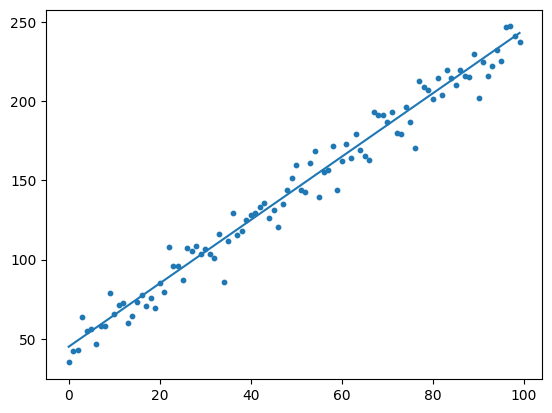

In [8]:
plt.scatter(x, y_noisy, s=10)
plt.plot(beta_0 + beta_1 * x)
plt.show()

In [9]:
print(beta_0, beta_1)

45.0 2.0
